In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [2]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
train_scaled = train_input/255.0

In [4]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu')) # sigmoid
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [7]:
# 검증손실 
  # 확인방법 : history에 validation_data로 확인

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌때마다 loss, accuracy 값을 저장
# train_scaled, val_scaled 함께 훈련시킴
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7723 - loss: 0.6678 - val_accuracy: 0.8377 - val_loss: 0.4521
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8528 - loss: 0.4085 - val_accuracy: 0.8611 - val_loss: 0.3892
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8710 - loss: 0.3593 - val_accuracy: 0.8761 - val_loss: 0.3442
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8794 - loss: 0.3257 - val_accuracy: 0.8762 - val_loss: 0.3415
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8873 - loss: 0.3086 - val_accuracy: 0.8790 - val_loss: 0.3332
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8926 - loss: 0.2908 - val_accuracy: 0.8785 - val_loss: 0.3360
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8998 - loss: 0.2726 - val_accuracy: 0.8692 - val_loss: 0.3803
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9026 - loss: 0.2639 - 

In [9]:
history.history['loss']
history.history['accuracy']

[0.8190624713897705,
 0.8585833311080933,
 0.871916651725769,
 0.8805833458900452,
 0.8885833621025085,
 0.8918958306312561,
 0.8961458206176758,
 0.901395857334137,
 0.9046041369438171,
 0.9084374904632568,
 0.911062479019165,
 0.9136250019073486,
 0.9161041378974915,
 0.9179166555404663,
 0.9216874837875366,
 0.9254375100135803,
 0.9241041541099548,
 0.9269583225250244,
 0.9286249876022339,
 0.9301875233650208]

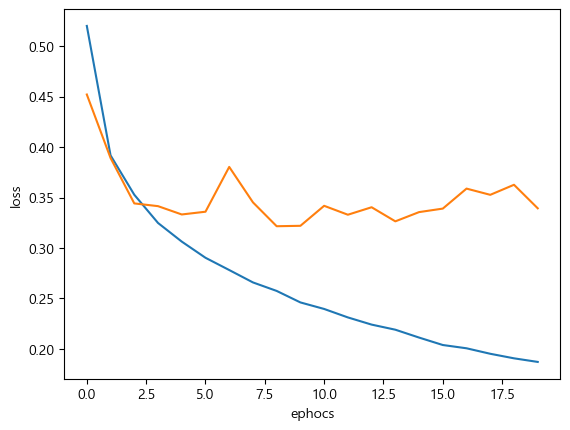

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('ephocs')
plt.ylabel('loss')
plt.show()

In [11]:
# loss 떨어뜨리기 위해 규제 사용

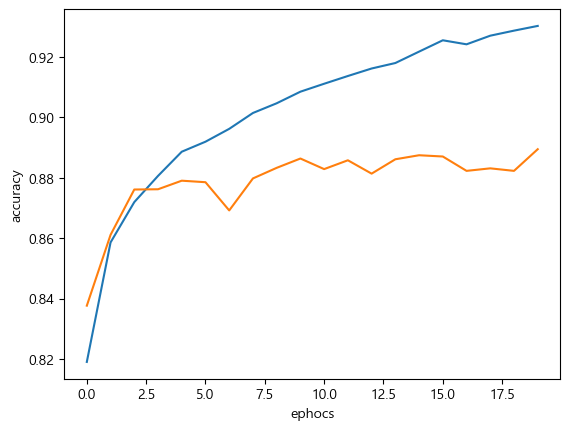

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('ephocs')
plt.ylabel('accuracy')
plt.show()

드롭아웃 규제 적용 : 과대적합 문제 해결

epochs를 증가할 때 훈련세트에는 정확도가 높은데 검증세트에는 정확도가 높지 않음

In [13]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) # 
model.add(keras.layers.Dense(100,activation='relu')) # sigmoid
model.add(keras.layers.Dropout(0.3)) # 30%를 제외시키는 규제적용
model.add(keras.layers.Dense(10,activation='softmax')) 

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌때마다 loss, accuracy 값을 저장
# train_scaled, val_scaled 함께 훈련시킴
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7361 - loss: 0.7631 - val_accuracy: 0.8456 - val_loss: 0.4210
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8407 - loss: 0.4437 - val_accuracy: 0.8637 - val_loss: 0.3746
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8532 - loss: 0.4066 - val_accuracy: 0.8655 - val_loss: 0.3655
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8594 - loss: 0.3865 - val_accuracy: 0.8642 - val_loss: 0.3632
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8691 - loss: 0.3627 - val_accuracy: 0.8735 - val_loss: 0.3507
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8718 - loss: 0.3511 - val_accuracy: 0.8684 - val_loss: 0.3551
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8736 - loss: 0.3432 - val_accuracy: 0.8710 - val_loss: 0.3509
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8760 - loss: 0.3353 - 

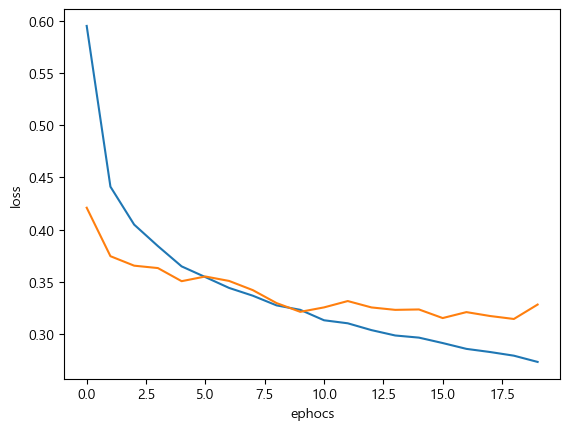

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('ephocs')
plt.ylabel('loss')
plt.show()

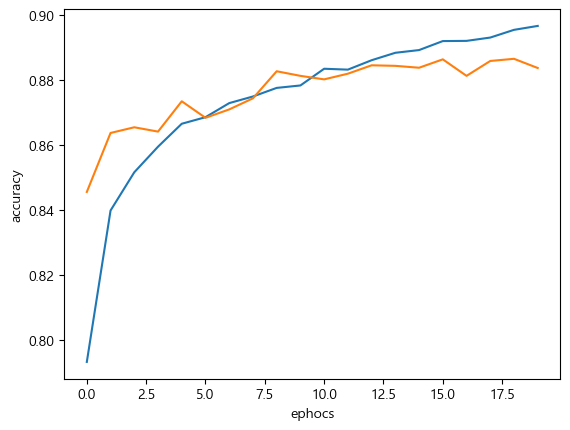

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('ephocs')
plt.ylabel('accuracy')
plt.show()

모델저장과 복원
- save_weights : 가중치만 저장
- save : 모델저장

In [18]:
model.save_weights('model0529.weights.h5')

In [19]:
model.save('model_all.h5')

In [17]:
# 딥러닝 훈련
# # 모델결정 model = keras.Sequential()
# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델 구성 확인 model.summary()
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,validation_data(val_scaled, val_target))
# 모델평가 model.evaluate(val_scaled,val_target)